<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/20150711_Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **데이터 불러오기**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data-nonlinear.txt", delimiter=',')
pointX  = data[:, 0].reshape(-1,1)
pointY  = data[:, 1].reshape(-1,1)
label   = data[:, 2].reshape(-1,1)

In [0]:
#Z 생성 함수
def generate_z(theta,x,y):
  li = []
  for i in range(10):
    for j in range(10):
      li.append((x**i)*(y**j))
  fxy = np.array(li).T
  return np.dot(fxy,theta).reshape(-1,1)
#로지스틱 함수
def Logit(z):
  return 1 / (1 + np.exp(-z))

#loss function 구현      
def energy(sigma, regcoef, theta):
  return -np.mean(label*np.log(sigma + 1e-9) + (1-label)*np.log(1-sigma + 1e-9)) + (regcoef * np.sum(theta**2) / 2)

In [0]:
#로지스틱 분류기 정의
class LogisticClassifier:
  #세타 값
  theta = np.linspace(2,3,100).astype('float64').reshape(-1,1)
  #규제 계수를 추가한 생성자
  def __init__(self, x, y, regcoef = 0):
    self.length = len(x)
    self.regcoef = regcoef
    self.gxy = generate_z(self.theta, x, y)
    self.sigmoid = Logit(self.gxy)
    self.temp_energy = energy(self.sigmoid, self.regcoef, self.theta)
  #예측함수
  def predict(self):
    label_pred = []
    for i in self.sigmoid:
      if i < 0.5:
        label_pred.append(0)
      else:
        label_pred.append(1)
    return label_pred
  #정확도 구하는 함수
  def accuracy(self,li):
    self.count = 0
    for i in range(len(li)):
      if(li[i] == label[i]):
        self.count+=1
    return self.count / len(li)
  #학습 함수
  def fit(self, x, y, alpha):
    li = []
    for i in range(10):
      for j in range(10):
        li.append((pointX**i)*(pointY**j))
    energy_val = [self.temp_energy]
    accuracy_val = [0]
    iteration = 100000
    for i in range(iteration):
      self.gra_theta = []
      for j in range(100):
        self.gra_theta.append(np.mean((self.sigmoid-label) * li[j]))
      self.gra_theta = (np.array(self.gra_theta).reshape(-1,1)) + (np.array(self.regcoef * self.theta))
      self.theta -= alpha * self.gra_theta
      self.gxy = generate_z(self.theta,x,y)
      self.sigmoid = Logit(self.gxy)
      accuracy_val.append(self.accuracy(self.predict()))
      self.next_energy = energy(self.sigmoid, self.regcoef,self.theta)
      energy_val.append(self.next_energy)
    return accuracy_val,energy_val

In [0]:
model = LogisticClassifier(pointX,pointY)
accuracy_val, energy_val = model.fit(pointX,pointY,3.5)

# **plot the training data**

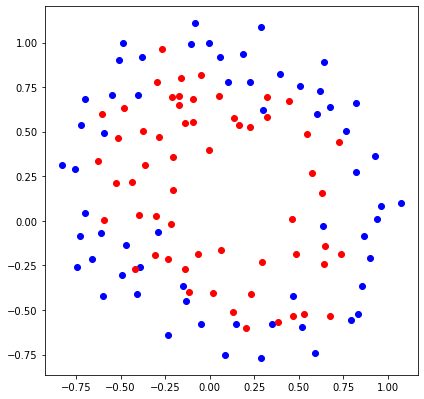

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure(figsize = (6,6))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# **plot the training error with varying regularization parameters**

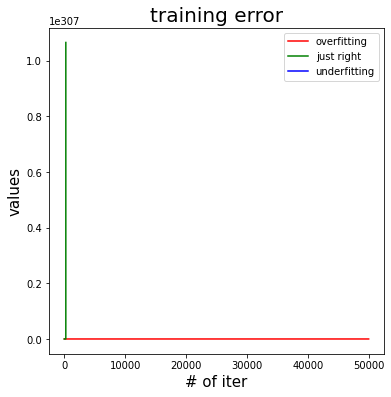

In [0]:
plt.figure(figsize = (6,6))
plt.title("training error",fontsize = 20)
plt.xlabel("# of iter",fontsize = 15)
plt.ylabel("values", fontsize = 15)
plt.plot(energy_arr[0],c = "r",label = "overfitting")
plt.plot(energy_arr[1],c = "g",label = "just right")
plt.plot(energy_arr[2],c = "b",label = "underfitting")
plt.legend(loc = "best")
plt.show()

# **Display the values of the chosen regularization parameters**

# **Plot the training accuracy with varying regularization parameters**

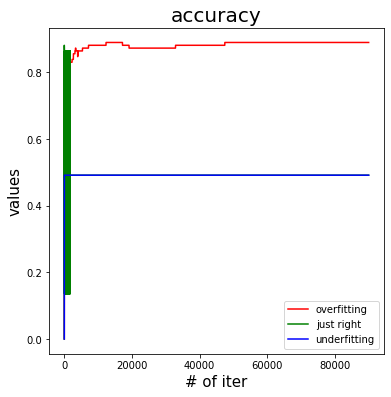

In [0]:
plt.figure(figsize = (6,6))
plt.title("accuracy",fontsize = 20)
plt.xlabel("# of iter",fontsize = 15)
plt.ylabel("values", fontsize = 15)
plt.plot(accu_arr[0],c = "r",label = "overfitting")
plt.plot(accu_arr[1],c = "g",label = "just right")
plt.plot(accu_arr[2],c = "b",label = "underfitting")
plt.legend(loc = "best")
plt.show()

# **Display the final training accuracy with varying regularization parameters**

# **Plot the optimal classifier with varying regularization parameters superimposed on the training data**

In [0]:
x_min, x_max = pointX.min()-0.2 , pointX.max()+0.05 
y_min, y_max = pointY.min()-0.2 , pointY.max()+0.2
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                     np.arange(y_min,y_max, 0.1))

Z = Logit(generate_z(model.theta,xx,yy))

In [0]:
plt.figure(figsize = (6,6))
plt.title("decision boundary", fontsize = 20)
plt.xlabel("X",fontsize = 15)
plt.ylabel("Y",fontsize = 15)
plt.contour(xx,yy,Z,levels = [0.5], colors = "red")
plt.contour(xx,yy,Z,levels = [0.5], colors = "green")
plt.contour(xx,yy,Z,levels = [0.5], colors = "blue")
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()